# Contexto

Este projeto tem por objetivo analisar os jogos do campeonato inglês de futebol (Premier League), o dataset dispõe de dados das partidas nas temporadas de 2009 a 2019. Faremos um análise exploratória de dados e utilizaremos de Data Visualization com o intuito de compreender melhor os dados e obter insights.

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lendo os dados

In [2]:
dados_partida = pd.read_csv('English_Premier_League_data_2009-2019.csv')
dados_partida.head(3)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2009-08-15 00:00:00,Aston Villa,Wigan,0,2,A,0,1,A,...,5,7,15,14,4,6,2,2,0,0
1,E0,2009-08-15 00:00:00,Blackburn,Man City,0,2,A,0,1,A,...,9,5,12,9,5,4,2,1,0,0
2,E0,2009-08-15 00:00:00,Bolton,Sunderland,0,1,A,0,1,A,...,3,13,16,10,4,7,2,1,0,0


# Tratamento dos dados (tradução)

In [3]:
#Excluindo uma variável que não utilizaremos e traduzindo nome das colunas
dados_partida.drop('Div', inplace=True, axis=1) 
dados_partida.columns = ['Data','Time_casa','Time_fora','Gols_90min_casa','Gols_90min_fora','Vencedor_90min','Gols_45min_casa',
       'Gols_45min_fora','Vencedor_45min','Juiz','Chutes_casa','Chutes_fora','Chutes_certos_casa','Chutes_certos_fora',
       'Faltas_casa','Faltas_fora','Escanteio_casa','Escanteio_fora','Amarelo_casa','Amarelo_fora','Vermelho_casa','Vermelho_fora']

In [4]:
#Traduzindo valor dos registros das variáveis
dados_partida.Vencedor_90min.replace(['H','A','D'],['Casa','Fora','Empate'], inplace=True)
dados_partida.Vencedor_45min.replace(['H','A','D'],['Casa','Fora','Empate'], inplace=True)

# Legenda

Data - Data que ocorreu o jogo <br>
Time_casa - Time que jogou como mandante<br>
Time_fora - Time que jogou como visitante<br>
Gols_90min_casa - Gols do time mandatante no jogo inteiro<br>
Gols_90min_fora - Gols do time visitante no jogo inteiro<br>
Vencedor_90min - Resultado Final (Casa - Time mandante ganhou, Fora - Time visitante ganhou, Empate - Bem intuitivo, né?)<br>
Gols_45min_casa - Gols no 1° tempo do time mandante<br>
Gols_45min_fora - Gols no 1° tempo do time visitante<br>
Vencedor_45min - Resultado 1° tempo - (Casa - Time mandante ganhou, Fora - Time visitante ganhou, Empate - Já sabem)<br>
Juíz - Nome do juíz que apitou a partida<br>
Chutes_casa - Total de chutes do time mandante<br>
Chutes_fora - Total de chutes do time visitante<br>
Chutes_certos_casa - Total chutes no gol do time mandante<br>
Chutes_certos_fora - Total chutes no gol do time visitante<br>
Faltas_casa - Total de faltas cometidas pelo time mandante<br>
Faltas_fora - Total de faltas cometidas pelo time visitante<br>
Escanteio_casa - Total de escanteios de ataque para o time mandante (concedidos pelo time visitante)<br>
Escanteio_fora - Total de escanteios de ataque para o time visitante (concedidos pelo time mandante)<br>
Amarelo_casa - Total de cartões amarelo recebido pelo time mandante<br>
Amarelo_fora - Total de cartões amarelo recebido pelo time visitantes<br>
Vermelho_casa - Total de cartões vermelho recebido pelo time mandante<br>
Vermelho_fora - Total de cartões vermelho recebido pelo time visitante<br>

In [5]:
#Iremos excluir essas colunas pois não utilizaremos nessa análise.

dados_partida = dados_partida.drop(['Vermelho_fora','Vermelho_casa','Amarelo_fora','Amarelo_casa','Escanteio_fora','Escanteio_casa',
                                    'Faltas_fora','Faltas_casa','Chutes_certos_fora','Chutes_certos_casa','Chutes_fora','Chutes_casa'],axis=1)

In [6]:
dados_partida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             3800 non-null   object
 1   Time_casa        3800 non-null   object
 2   Time_fora        3800 non-null   object
 3   Gols_90min_casa  3800 non-null   int64 
 4   Gols_90min_fora  3800 non-null   int64 
 5   Vencedor_90min   3800 non-null   object
 6   Gols_45min_casa  3800 non-null   int64 
 7   Gols_45min_fora  3800 non-null   int64 
 8   Vencedor_45min   3800 non-null   object
 9   Juiz             3800 non-null   object
dtypes: int64(4), object(6)
memory usage: 297.0+ KB


# Análise Exploratória de dados 

### Quantas partidas foram jogadas entre 2009 e 2019 na PL?


In [7]:
dados_partida.shape[0]

3800

### Quais e quantos times jogaram a PL durante essas 10 temporadas?


In [8]:
total_times = dados_partida.Time_casa.unique()
total_times_DF = pd.DataFrame(total_times)
print('{} times jogaram a PL nas últimas 10 temporadas'.format(total_times_DF.count().values[0]))
print('Esses times participaram do campeonato: {}'.format(str(total_times)))

36 times jogaram a PL nas últimas 10 temporadas
Esses times participaram do campeonato: ['Aston Villa' 'Blackburn' 'Bolton' 'Chelsea' 'Everton' 'Portsmouth'
 'Stoke' 'Wolves' 'Man United' 'Tottenham' 'Sunderland' 'Wigan'
 'Birmingham' 'Burnley' 'Hull' 'Liverpool' 'Arsenal' 'Man City' 'Fulham'
 'West Ham' 'West Brom' 'Newcastle' 'Blackpool' 'QPR' 'Swansea' 'Norwich'
 'Reading' 'Southampton' 'Crystal Palace' 'Cardiff' 'Leicester'
 'Bournemouth' 'Watford' 'Middlesbrough' 'Brighton' 'Huddersfield']


### Quantas partidas foram jogadas por cada time nas últimas 10 temporadas?


In [9]:
partidas_total = dados_partida.Time_casa.value_counts()+dados_partida.Time_fora.value_counts()
partidas_total

Arsenal           380
Everton           380
Man United        380
Chelsea           380
Man City          380
Tottenham         380
Liverpool         380
West Ham          342
Stoke             342
Newcastle         304
West Brom         304
Sunderland        304
Aston Villa       266
Swansea           266
Southampton       266
Fulham            228
Crystal Palace    228
Burnley           190
Leicester         190
Norwich           152
Wolves            152
Hull              152
Bournemouth       152
Wigan             152
Watford           152
Bolton            114
QPR               114
Blackburn         114
Huddersfield       76
Brighton           76
Birmingham         76
Cardiff            76
Portsmouth         38
Middlesbrough      38
Reading            38
Blackpool          38
dtype: int64

In [10]:
### Quais times participaram de todas as últimas 10 temporadas da PL?


In [11]:
#Como cada temporada tem 38 jogos, sendo metade como mandante e metade como visitante, pode-se concluir que:

times_jogos_casa = dados_partida.Time_casa.value_counts().reset_index()
melhores_times = times_jogos_casa.query('Time_casa==190')
melhores_times['index']

0       Arsenal
1       Everton
2    Man United
3       Chelsea
4      Man City
5     Tottenham
6     Liverpool
Name: index, dtype: object

### Quais times jogaram só uma  temporada?

In [12]:

#Seguindo o raciocínio da pergunta anterior, para um time jogar só uma temporada, ele tem que ter no máximo 38 partidas, sendo
#19 como visitante e 19 como mandante

times_jogos_casa.query('Time_casa==19')['index']

32       Portsmouth
33    Middlesbrough
34          Reading
35        Blackpool
Name: index, dtype: object

### Qual a porcentagem de jogos ganhos por times mandantes, visitantes e/ou empates?


In [13]:
percentual_vitoria = dados_partida.Vencedor_90min.value_counts(normalize=True)*100
percentual_vitoria

Casa      46.263158
Fora      29.000000
Empate    24.736842
Name: Vencedor_90min, dtype: float64

### Quantos juízes apitaram os jogos entre 2009 e 2010?


In [14]:
juizes = dados_partida.Juiz.unique()
pd.DataFrame(juizes).count()[0]


30

### Liste-os com o total de partidas apitadas


In [15]:
dados_partida.Juiz.value_counts()

M Dean           291
M Atkinson       280
A Marriner       253
M Oliver         234
A Taylor         226
L Mason          222
M Clattenburg    206
K Friend         204
J Moss           200
M Jones          190
L Probert        159
P Dowd           159
H Webb           147
C Foy            135
C Pawson         134
N Swarbrick      132
R Madley          91
R East            91
S Attwell         89
P Walton          69
M Halsey          61
P Tierney         55
G Scott           50
C Kavanagh        40
S Bennett         29
A Wiley           26
D Coote           12
S Hooper          10
K Stroud           3
A Madley           2
Name: Juiz, dtype: int64

### Em quantos jogos os times que estavam perdendo no 1tempo, ganharam o jogo no final?(vitória de virada) Liste todos eles


In [16]:
vencedores = dados_partida[['Vencedor_45min','Vencedor_90min']]
vitoria_de_virada = vencedores.query('Vencedor_45min=="Casa" and Vencedor_90min=="Fora" or Vencedor_45min=="Fora" and Vencedor_90min=="Casa"')
print(vitoria_de_virada.count()[0])
vitoria_de_virada

153


,Vencedor_45min,Vencedor_90min
10,Casa,Fora
29,Fora,Casa
45,Fora,Casa
108,Fora,Casa
113,Fora,Casa
...,...,...
3659,Fora,Casa
3702,Fora,Casa
3714,Fora,Casa
3715,Fora,Casa


### Generate a data frame with the following info:<br>
a. Number of games per team. <br>
b. Home wins per team.<br>
c. Home defeats per team.<br>
d. Away wins per team.<br>
e. Away defeats per team.<br>
f. Number of draw per teams (home and away combined).<br>
g. Total points in EPL across 10 seasons.<br>

In [17]:
#a

jogos_por_time = dados_partida.Time_casa.value_counts()*2
jogos_por_time = pd.DataFrame(jogos_por_time)
jogos_por_time.sort_index(inplace=True)

In [18]:
#b
# Casa = 0, Fora = 1, Empate = 2 

dados_partida['Vencedor_90min_numerico'] = dados_partida.Vencedor_90min.replace(['Casa','Fora','Empate'],[0,1,2])
colunas=['Time_casa','Vencedor_90min_numerico']
vitoria_casa = dados_partida[(dados_partida.Vencedor_90min_numerico == 0)][colunas].groupby('Time_casa').count()

In [19]:
#c

derrota_casa = dados_partida[(dados_partida.Vencedor_90min_numerico == 1)][colunas].groupby('Time_casa').count()

In [20]:
#d
colunas2=['Time_fora','Vencedor_90min_numerico']
vitoria_fora = dados_partida[(dados_partida.Vencedor_90min_numerico == 1)][colunas2].groupby('Time_fora').count()


In [21]:
#e
derrota_fora = dados_partida[(dados_partida.Vencedor_90min_numerico == 0)][colunas2].groupby('Time_fora').count()


In [22]:
#f
empate = dados_partida[(dados_partida.Vencedor_90min_numerico == 2)][colunas].groupby('Time_casa').count()
empate2 = dados_partida[(dados_partida.Vencedor_90min_numerico == 2)][colunas2].groupby('Time_fora').count()

empate3 = empate.values+empate2.values

empate3=pd.DataFrame(empate3,index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough'])
empate3.sort_index(inplace=True)


In [23]:
#g
dados_partida.loc[dados_partida['Vencedor_90min']=='Casa', 'Pontos_casa'] = 3
dados_partida.loc[dados_partida['Vencedor_90min']=='Fora', 'Pontos_casa'] = 0
dados_partida.loc[dados_partida['Vencedor_90min']=='Empate', 'Pontos_casa'] = 1

dados_partida.loc[dados_partida['Vencedor_90min']=='Casa', 'Pontos_fora'] = 0
dados_partida.loc[dados_partida['Vencedor_90min']=='Fora', 'Pontos_fora'] = 3
dados_partida.loc[dados_partida['Vencedor_90min']=='Empate', 'Pontos_fora'] = 1




In [24]:
pontos_casa = dados_partida[['Time_casa','Pontos_casa']].groupby('Time_casa').sum()
pontos_fora = dados_partida[['Time_fora','Pontos_fora']].groupby('Time_fora').sum()
pontos_total = pontos_casa.values + pontos_fora.values
pontos_totall = pd.DataFrame(index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough'])
pontos_totall.sort_index(inplace=True)

pontos_totall['Pontos total'] = pontos_total


In [25]:
times_dados = pd.concat([jogos_por_time,vitoria_casa,derrota_casa,vitoria_fora,derrota_fora,empate3,pontos_totall],axis=1)
times_dados.columns=['Partidas','Vitórias casa','Derrotas casa','Vitórias fora','Derrotas fora','Empates','Pts']
times_dados

,Partidas,Vitórias casa,Derrotas casa,Vitórias fora,Derrotas fora,Empates,Pts
Arsenal,380,129,24,84,63,28,719.0
Aston Villa,266,38,54,31,66,17,284.0
Birmingham,76,14,7,7,22,83,89.0
Blackburn,114,23,20,9,34,10,124.0
Blackpool,38,5,9,5,10,87,39.0
Bolton,114,20,22,12,35,77,121.0
Bournemouth,152,29,28,18,41,69,177.0
Brighton,76,13,12,5,24,89,76.0
Burnley,190,35,38,16,57,94,197.0
Cardiff,76,11,20,6,26,66,64.0


### Quais jogos tiveram mais gols?


In [26]:
dados_partida['gols']=dados_partida.Gols_90min_casa+dados_partida.Gols_90min_fora
dados_partida['gols'].sort_values(ascending=False).head(20)

1328    10
1517    10
126     10
785     10
2503     9
3418     9
1921     9
200      9
1674     9
1811     9
2892     9
3113     9
2785     9
134      8
3599     8
2387     8
1728     8
627      8
309      8
625      8
Name: gols, dtype: int64

In [27]:
dados_partida.query('gols>8').head(3)

,Data,Time_casa,Time_fora,Gols_90min_casa,Gols_90min_fora,Vencedor_90min,Gols_45min_casa,Gols_45min_fora,Vencedor_45min,Juiz,Vencedor_90min_numerico,Pontos_casa,Pontos_fora,gols
126,2009-11-22 00:00:00,Tottenham,Wigan,9,1,Casa,1,0,Casa,P Walton,0,3.0,0.0,10
200,2010-01-16 00:00:00,Chelsea,Sunderland,7,2,Casa,4,0,Casa,C Foy,0,3.0,0.0,9
785,2011-08-28 00:00:00,Man United,Arsenal,8,2,Casa,3,1,Casa,H Webb,0,3.0,0.0,10


### Descubra os gols marcados como mandante, visitante e total para cada time



In [28]:
gols_casa = dados_partida[['Time_casa','Gols_90min_casa']].groupby('Time_casa').sum()
gols_fora = dados_partida[['Time_fora','Gols_90min_fora']].groupby('Time_fora').sum()
gols_total_lista = gols_casa.values + gols_fora.values

gols_total = pd.DataFrame(index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough'])

gols_total.sort_index(inplace=True)

gols_total['Gols total'] = gols_total_lista

add=pd.concat([gols_casa,gols_fora,gols_total],axis=1)
add.columns=['Gols_casa','Gols_fora','Gols_total']
add

,Gols_casa,Gols_fora,Gols_total
Arsenal,410,319,729
Aston Villa,152,129,281
Birmingham,38,37,75
Blackburn,76,59,135
Blackpool,30,25,55
Bolton,83,57,140
Bournemouth,114,87,201
Brighton,43,26,69
Burnley,105,85,190
Cardiff,41,25,66


In [29]:
times = pd.concat([times_dados,add],axis=1)
times.reset_index(inplace=True)
times.rename(columns={'index':'Time'},inplace=True)

# Data  Visualization

In [35]:
times['Vitórias_total'] = times['Vitórias casa'] + times['Vitórias fora']
times['Derrotas_total'] = times['Derrotas casa'] + times['Derrotas fora']
times.head()

,Time,Partidas,Vitórias casa,Derrotas casa,Vitórias fora,Derrotas fora,Empates,Pts,Gols_casa,Gols_fora,Gols_total,Vitórias_total,Derrotas_total
0,Arsenal,380,129,24,84,63,28,719.0,410,319,729,213,87
1,Aston Villa,266,38,54,31,66,17,284.0,152,129,281,69,120
2,Birmingham,76,14,7,7,22,83,89.0,38,37,75,21,29
3,Blackburn,114,23,20,9,34,10,124.0,76,59,135,32,54
4,Blackpool,38,5,9,5,10,87,39.0,30,25,55,10,19


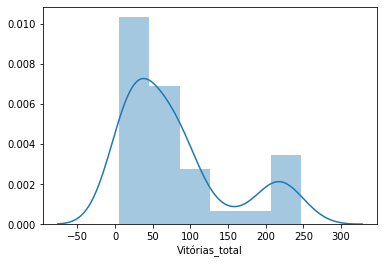

In [31]:
sns.distplot(times['Vitórias_total']) #Muitos times com poucas vitórias

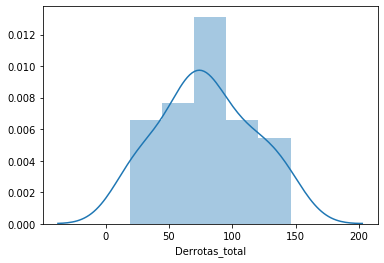

In [36]:
sns.distplot(times['Derrotas_total'])

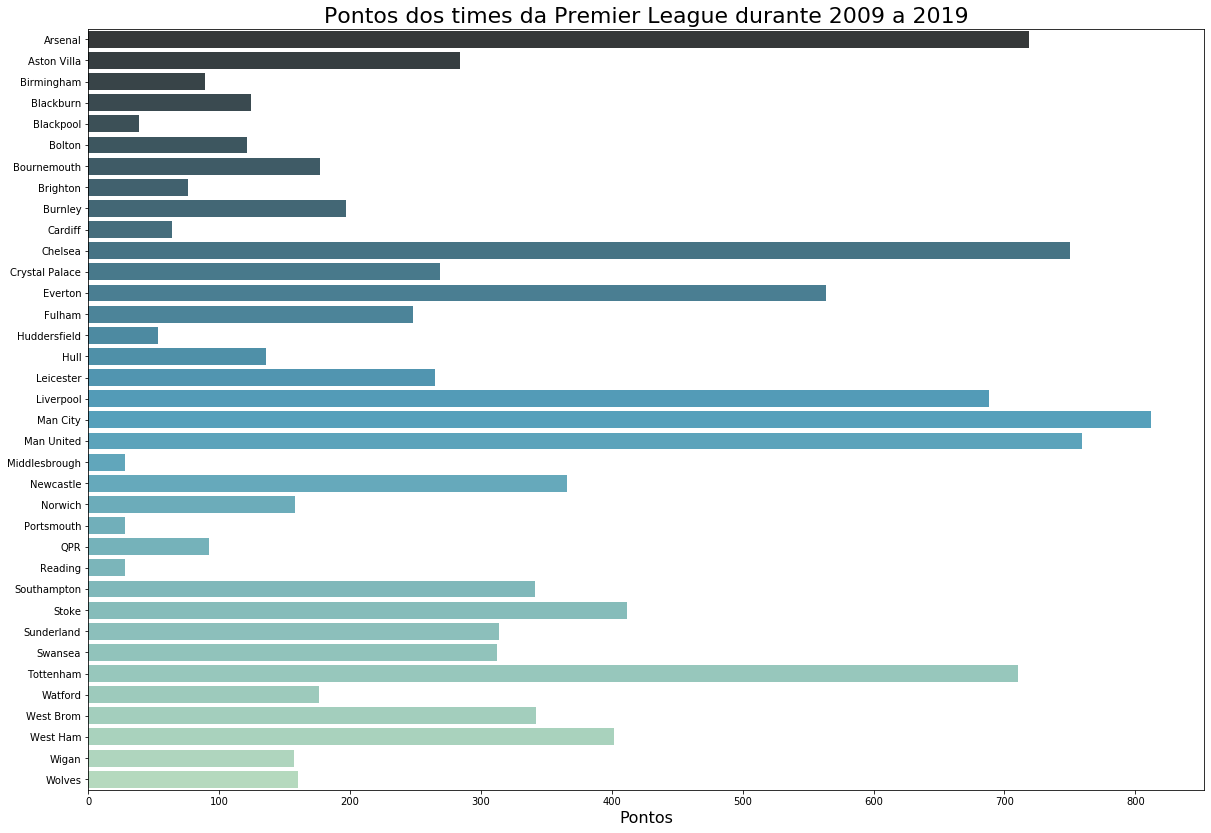

In [32]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x='Pts',y='Time', data=times, palette = 'GnBu_d')
ax.set_title('Pontos dos times da Premier League durante 2009 a 2019', fontsize=22)
ax.set_xlabel('Pontos', fontsize=16)
ax.set_ylabel('')
ax

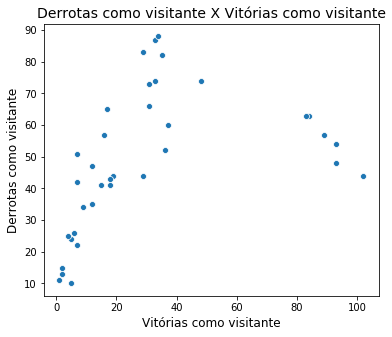

In [40]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.scatterplot(x='Vitórias fora', y='Derrotas fora', data=times)
ax.set_title('Derrotas como visitante X Vitórias como visitante',fontsize=14)
ax.set_xlabel('Vitórias como visitante', fontsize=12)
ax.set_ylabel('Derrotas como visitante', fontsize=12)
ax
#Até 40, quanto maior as vitórias como visitante, maior são as derrotas como visitante. Contudo, a partir desse ponto, quanto
#maior as vitórias, menor é o número de derrotas. Isso pode estar acontecendo pois esses são os melhores times do campeonato.

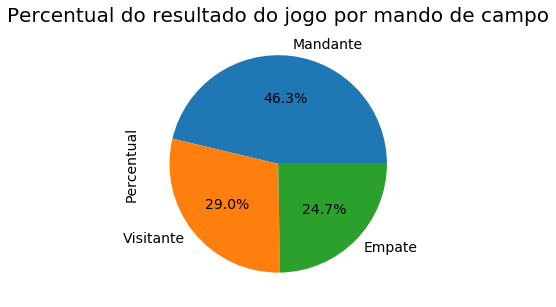

In [34]:
resultados_porcentagem = pd.DataFrame(percentual_vitoria)
labels=['Mandante','Visitante','Empate']

resultados_porcentagem.plot(kind='pie', y='Vencedor_90min',
                            labels=labels, legend=False,
                            autopct='%1.1f%%',fontsize=14,
                           figsize=(5,5))
plt.title('Percentual do resultado do jogo por mando de campo', fontsize=20)
plt.ylabel('Percentual', fontsize=14);
